# Exploración del dataset y creación del modelo 

### Cargamos las librerias necesarias para la exploración del dataset y creación del modelo.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plot
from sklearn import metrics
import pandas as pd
import numpy as np

### Se carga el dataset previamente porcesado en bash.

In [2]:
# Primer paso: Descargar el dataset procesado por el archivo de bash.

caravan = pd.read_csv("../../ticdata2000_wh.txt", sep = "|")
caravan.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


### Distribución de las variables en el Data Set

In [4]:
caravan.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256,0.059773
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996,0.237087
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000


### Selección de variables 

Este paso se hizo con base en lo reportado en el articulo: [Feature Selection to Kaggle Caravan Insurance Challenge on R](https://medium.com/swlh/feature-selection-to-kaggle-caravan-insurance-challenge-on-r-bede801d3a66).



In [5]:
#Seleccionamos las variables más importantes de acuerdo con el modelo de referencia. 
caravan = caravan.iloc[:,[17, 40, 46, 57, 58, 81, 82, 85]]

### Comprobamos que no haya NA's en el dataset definitivo.

In [6]:
missings_prop = caravan.apply(lambda x: round(x.isnull().sum()/caravan.shape[0]*100, 2))
missings_numeric_caravan = pd.DataFrame({'proporcion_de_valores_faltantes': missings_prop})
missings_numeric_caravan

,proporcion_de_valores_faltantes
MOPLLAAG,0.0
MINK123M,0.0
PPERSAUT,0.0
PWAOREG,0.0
PBRAND,0.0
APLEZIER,0.0
AFIETS,0.0
CARAVAN,0.0


In [7]:
# No se encuntran NA's en el dataset.
missings_numeric_caravan[missings_numeric_caravan.proporcion_de_valores_faltantes != 0].count()

proporcion_de_valores_faltantes    0
dtype: int64

Graficamos los histogramas de las variables de interés

(array([ 299.,  243.,  667.,  680.,  851., 1009.,  856.,  640.,  254.,
         323.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

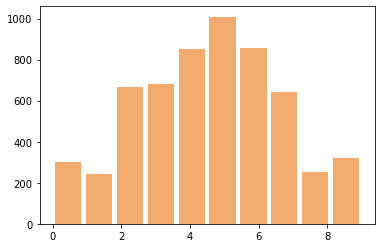

In [14]:
plot.hist(x=caravan.MOPLLAAG, color='#F2AB6D', rwidth=0.85,)

(array([4.90e+03, 7.63e+02, 9.60e+01, 3.60e+01, 2.40e+01, 1.00e+00,
        0.00e+00, 1.00e+00, 0.00e+00, 1.00e+00]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

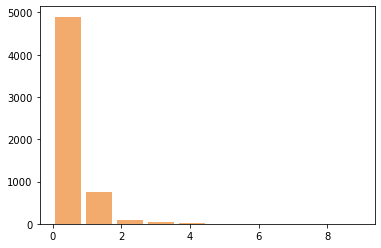

In [15]:
plot.hist(x=caravan.MINK123M, color='#F2AB6D', rwidth=0.85,)

(array([2.845e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        6.130e+02, 2.319e+03, 4.100e+01, 3.000e+00]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

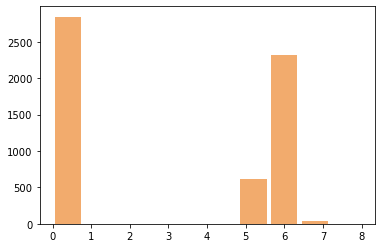

In [16]:
plot.hist(x=caravan.PPERSAUT, color='#F2AB6D', rwidth=0.85,)

(array([5.799e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.900e+01, 2.000e+00]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

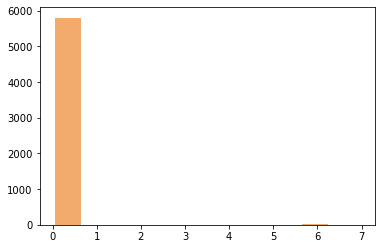

In [17]:
plot.hist(x=caravan.PWAOREG, color='#F2AB6D', rwidth=0.85,)

(array([2.666e+03, 1.610e+02, 5.350e+02, 9.200e+02, 0.000e+00, 1.226e+03,
        1.490e+02, 1.550e+02, 9.000e+00, 1.000e+00]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <BarContainer object of 10 artists>)

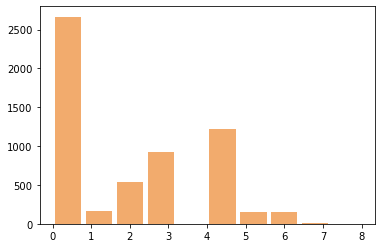

In [18]:
plot.hist(x=caravan.PBRAND, color='#F2AB6D', rwidth=0.85,)

(array([5.789e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.100e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

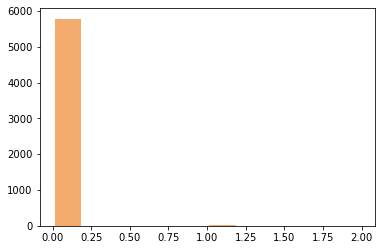

In [19]:
plot.hist(x=caravan.APLEZIER, color='#F2AB6D', rwidth=0.85,)

(array([5.675e+03, 0.000e+00, 0.000e+00, 1.110e+02, 0.000e+00, 0.000e+00,
        3.400e+01, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

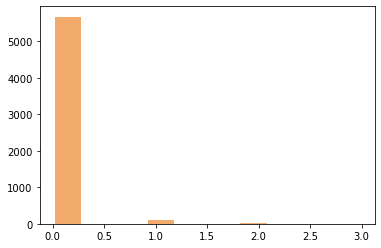

In [21]:
plot.hist(x=caravan.AFIETS, color='#F2AB6D', rwidth=0.85,)

0    5474
1     348
Name: CARAVAN, dtype: int64

La cantidad de etiquetas positivas y negativas es la siguiente:

In [25]:
caravan.CARAVAN.value_counts()

0    5474
1     348
Name: CARAVAN, dtype: int64

In [29]:
# Definimos la función que entrena un modelo de regresión logística para nuestro conjunto de datos.

def modelado(data):
    """
    Esta función recibe un conjunto de datos previamente procesado y descargado de la web mediante Bash para entrenar un modelo de regresión logística. 
    Debido a que este es un ejercicio didáctico donde no se evalúa la parte de modelado, se omite el paso de selección de variables (Feature Engineering) 
    y se toma de referencia  un trabajo reportado en https://medium.com/swlh/machine-learning-to-kaggle-caravan-insurance-challenge-on-r-f52790bc7669 donde
    se definen las variables más importantes que encontraron para realizar las predicciones de seguros de caravanas.
    Argumentos: (ninguno)
    Salidas:
        modelo (objeto): Contiene el modelo que resultó del conjunto de entrenamiento
        precision (float): Métrica de Precisión del modelo
        recall (float): Métrica de recall del modelo
        
    """
    df_train_test = data
    # Separación del conjunto en entrenamiento y prueba (75% de los datos para entrenar el modelo)
    X = df_train_test.iloc[:,:-1]
    #y = df_train_test.caravan -->cambiar
    y = df_train_test.CARAVAN
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

    # Modelo con parámetros por default
    logreg = LogisticRegression()
    
    # Entrenamiento del modelo
    modelo = logreg.fit(X_train,y_train)

    # Predicciones en el conjunto de prueba
    y_pred=logreg.predict(X_test)

    # Métricas resultantes del modelo
    recall = metrics.recall_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)

    return modelo, precision, recall, df_train_test

In [32]:
modelo, precision, recall, df_train_test = modelado(caravan)

## Métricas

Para este modelo decidimos utilizar Precision y Recall como métricas de desempeño ya que el problema de negocio requería enfocarse en los clientes con más probabilidad de adquirir una caravan.

In [35]:
print(" Precisión del modelo: ", precision, "\n Recall del modelo: ",recall)

 Precisión del modelo:  0.2 
 Recall del modelo:  0.010526315789473684


### Creación del data profiling en archivo html usando la función `ProfileReport` del modulo `pandas_profiling`.

In [ ]:
profile = ProfileReport(caravan)
profile.to_file(output_file='data_profiling.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 317.56it/s]
